# FIT5201: Assessment 2
## Linear Models for Regression and Classification

## Objectives
This assignment assesses your understanding of linear models for regression and classification, covered in Modules 2 and 3. The total marks of this assessment is __100__, and has 30% contribution to your final score.

## Important Note
* You can complete your assignment using the codes shared in the unit (ie Alexandria and Moodle) and this template as the bases. However, <font color='red'>**you should make sure the codes you are using are correct and relevant to the question**</font>.

* Please follow the structure of this template as much as you can.

* You can use the prepopulated codes cells or change them if you prefer. However, please do not change the name of the key variables, functions, and parameters eg `rmse`, `lambda`, `train.data`. It helps us to read and understand your submissiont more efficiently.

## Part A. Ridge Regression
In this part, you develop Ridge Regression by adding the $L_2$ norm regularization to the linear regression (covered in Activity __1__ of Module __2__). This part assesses your mathematical (calculating derivatives) and programming skills.

### Question 1 [Ridge Regression, 35 Marks]
__Q1-1__) Given the gradient descent algorithms for linear regression (discussed in Chapter 2 of Module 2), derive weight update steps of stochastic gradient descent (SGD) as well as batch gradient descent (BGD) for linear regression with $L_2$ regularisation norm. Show your work with enough explanation. Please provide the steps of SGD and BGD, separately.

__Hint__: Recall that for linear regression we defined the error function $E$ and set its derivation to zero. For this assignment, you only need to add an $L_2$ regularization term to the error function and set the derivative of both terms (error term plus the regularization term) to zero. This question is similar to Activity __1__ of Module __2__.



### Background

The 'total error function' for ridge regression is composed of the 'error function' and the 'regularization term'.
\begin{aligned}
    E(\mathbf{w}) &= \frac{1}{2}\sum_{i=1}^N(t_i - \hat{t}_i)^2+\frac{\lambda}{2}\sum_{j=1}^M w_j^2 \\
    &= \frac{1}{2}\sum_{i=1}^N (t_i - y(\mathbf{x}_i,\mathbf{w}))^2+\frac{\lambda}{2}\sum_{j=1}^M w_j^2 
\end{aligned}

We wish to minimize $E(\mathbf{w})$ by setting $\nabla E(\mathbf{w}) = 0$ and solving for $\mathbf{w}$ but we use the gradient descent algorithm to achieve this.

We have

\begin{aligned}
    \frac{\partial E}{\partial w_k} &= -\sum_{i=1}^N (t_i - y(\mathbf{x}_i,\mathbf{w}))\phi_k(\mathbf{x}_i) + \lambda w_k \\
\end{aligned}

Where $y(\mathbf{x},\mathbf{w}) = w \cdot \phi(\mathbf{x})$


The weight update step with a step-size $\eta$ for the $k$th dimension in BGD ridge regression is

\begin{aligned}
    w^{\tau +1}_k &= w^{\tau}_k - \eta \frac{\partial E(\mathbf{w^{\tau}})}{\partial w_k}  \\
    &= w^{\tau}_k - \eta (-\sum_{i=1}^N (t_i - y(\mathbf{x}_i,\mathbf{w}))\phi_k(\mathbf{x}_i) + \lambda w_k ) \\
    &= (1-\eta \lambda ) w^{\tau}_k + \eta \sum_{i=1}^N(t_i - y(\mathbf{x}_i,\mathbf{w}))\phi_k(\mathbf{x}_i)
\end{aligned}

 in SGD ridge regression is
$$
    w^{\tau +1}_k = (1-\eta \lambda ) w^{\tau}_k + \eta (t_i - y(\mathbf{x}_i,\mathbf{w}))\phi_k(\mathbf{x}_i)
$$

__Q1-2__) Using R (with no use of special libraries), implement SGD and BGD algorithms that you derived in Q1-1. The implementation is straightforward as you are allowed to use the code examples from Activity __1__ in Module __2__.


In [1]:
library(ggplot2)  # for plotting functions.
library(reshape2) # for melt and cast functions
library(mvtnorm)  # generates multivariate Gaussian sampels and calculate the densities
library(gridExtra) # for grid.arrange()

Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'reshape2' was built under R version 3.4.4"Warning message:
"package 'gridExtra' was built under R version 3.4.4"

In [2]:
# auxiliary function to calculate labels based on the estimated coefficients
predict_func <- function(Phi, w){
    return(Phi%*%w)
} 

In [3]:
#' Calculates the root-mean-squared error
#'
#' @param a a collection of continuous values
#' @param b a collection of continuous values
#' @return the root-mean-squared error
rmse <- function(a, b) {
    errors <- (a-b)
    return (sqrt(mean(errors^2)))    
}

In [4]:
# auxiliary function to calculate a cost function
error_func <- function (Phi, w, label){
    return(rmse(predict_func(Phi, w), label))
}

Create the Stochastic Gradient Descent function

In [5]:
#' Trains a Stochastic Gradient Descent (SGD) model
#'
#' @param train.data the predictors for the training set
#' @param train.label the labels for the training set
#' @param eta the learning rate
#' @param ta.max maximum iterations
#' @param lambda regularisation parameter
#' @return a list containing:
#'   tau - iteration count
#'   coeff - optimal coefficients
#'   predict - a function that accepts training data and predicts labels using coeff
SGD <- function(train.data, train.label, eta = 0.05, tau.max = 20, lambda = 1){
    Phi <- as.matrix(cbind('x0'=1, train.data))
    W <- matrix(,nrow=tau.max, ncol=ncol(Phi)) # be used to store the estimated coefficients
    W[1,] <- 0 # Set the initial weights to 0
    T <- train.label  # Makes the code a bit easier to read

    train.len <- nrow(train.data)

    error <- data.frame('tau'=1:tau.max)  # to be used to trace the test and training errors in each iteration    

    tau <- 1    
    while (tau < tau.max) {
        
        # shuffle data:
        train.index <- sample(1:train.len, train.len, replace = FALSE)

        Phi <- Phi[train.index,]
        T <- T[train.index]

        for (i in 1:train.len) {
            if (tau >= tau.max) {
                break;
            }
            t_pred = predict_func(Phi[i,], W[tau,])
            for (j in 1: ncol(W)) {
                W[(tau+1),j] <- (1-eta*lambda)*W[tau,j] + eta * (T[i]-t_pred) * Phi[i,j]
            }
            error[tau, 'RMSE'] <- error_func(Phi, W[tau,], T)

            tau <- tau + 1
        }        
    }
    
    return(list("tau"=tau, "coeff"=W[tau,], "error"=error))
}

Create the Batch Gradient Descent function

In [6]:
#' Trains a Batch Gradient Descent (SGD) model
#'
#' @param train.data the predictors for the training set
#' @param train.label the labels for the training set
#' @param eta the learning rate
#' @param ta.max maximum iterations
#' @param lambda regularisation parameter
#' @return a list containing:
#'   tau - iteration count
#'   coeff - optimal coefficients
#'   predict - a function that accepts training data and predicts labels using coeff
BGD <- function(train.data, train.label, eta = 0.05, tau.max = 20, lambda = 1) {
    Phi <- as.matrix(cbind('x0'=1, train.data))
    W <- matrix(,nrow=tau.max+1, ncol=ncol(Phi)) # be used to store the estimated oefficients
    W[1,] <- 0 # Set the initial weights to 0
    T <- train.label  # Makes the code a bit easier to read

    train.len <- nrow(train)

    error <- data.frame('tau'=1:tau.max)  # to be used to trace the test and training errors in each iteration    


    
    for (tau in 1:tau.max) {
        
        t_pred <- predict_func(Phi, W[tau,])
        
        for (j in 1: ncol(W)) {
            W[(tau+1),j] <- (1-eta*lambda)*W[tau,j] + eta* sum((T-t_pred) * Phi[, j])
        }
        error[tau, 'RMSE'] <- error_func(Phi, W[tau,], train.label)
        
    }
    return(list("tau"=tau, "coeff"=W[tau,], "error"=error, "W"=W))
}

__Q1-3__) Now let’s compare SGD and BGD implementations of Ridge regression from Q1-2:


__Q1-3A__. Load __Task2A_train.csv__ and __Task2A_test.csv__ datasets,


In [7]:
set.seed(1234)

# Load training and test data
train <- scale(read.csv('../Task2A_train.csv'))
test <- scale(read.csv('../Task2A_test.csv'))

# Shuffle the training data 
## (You may need to comment set.seed(1234) if you want to see different results)
train <- train[sample(nrow(train)), ]

train.data <- subset(train, select = -c(y))
train.label <- train[, 'y']
test.data <- subset(test, select = -c(y) )
test.label <- test[, 'y']

__Q1-3B__. Set the termination criterion as maximum of 20 weight updates for BGD, which is equivalent to $20 \times N$ weight updates for SGD (where $N$ is the number of training data),

In [8]:
N <- nrow(train)
N 

[1] 930

In [9]:
bgd.tau.max <- 20
sgd.tau.max <- 20 * N
sgd.tau.max

[1] 18600

In [10]:
eta <- 0.0005
lambda <- 1

__Q1-3C__. Run your implementations of SGD and BGD while all parameter settings (initial values, learning rate etc.) are exactly the same for both algorithms. During run, record training error rate every time the weights get updated. Create a plot of error rates (use different colors for SGD and BGD), where the x-axis is the number of visited data points and y-axis is the error rate. Note that for every $N$ errors for SGD in the plot, you will only have one error for BGD; the total length of the x-axis will be $20 \times N$.


Run the SGD

In [11]:
results.sgd <- SGD(train.data, train.label, tau.max=sgd.tau.max, eta, lambda)

Run the BSD

In [12]:
results.bgd <- BGD(train.data, train.label, tau.max=bgd.tau.max, eta, lambda)

Reshape if neccessary, then plot them.

In [13]:
# Reshape data.frames

In [14]:
# how many tau values in sgd?
nrow(results.sgd$error)

[1] 18600

In [15]:
# how many tau values in bgd?
dim(results.bgd$error)

[1] 20  2

Since they are not equal, we will 'scale' each bgd tau value to represent one cycle through all the N training points in SGD:

In [16]:
bgd.modified.RMSEs <- results.bgd$error
bgd.modified.RMSEs[,1] <- bgd.modified.RMSEs[,1]*N

In [17]:
tail(results.bgd$error,3)

,tau,RMSE
18,18,0.1261278
19,19,0.1259840
20,20,0.1258384


In [18]:
# combine both dataframes together, with a new column to distinguish SGD from BGD values
results.combined <-rbind(cbind(results.sgd$error, type = 'SGD'),cbind(bgd.modified.RMSEs, type = 'BGD'))

We plot two graphs, first on the SGD $\tau$ scale (1-18600)  and second on the BGD $\tau$ scale (1-20), where each integer corresponds to an entire cycle through all training points in SGD.

Warning message:
"Removed 1 rows containing missing values (geom_path)."

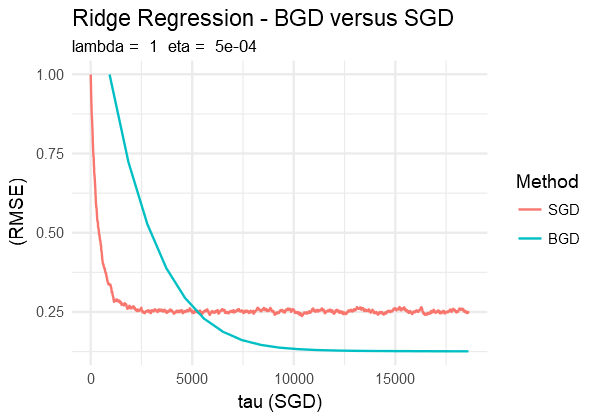

In [19]:
# Plot the errors on a shared frame
options(repr.plot.width=5, repr.plot.height=3.5)
ggplot(data=(results.combined), aes(x=(tau), y=(RMSE), colour = type)) +
    geom_line() +xlab('tau (SGD)') +
    ggtitle('Ridge Regression - BGD versus SGD', subtitle=paste('lambda = ', lambda, " eta = ", eta)) +
    scale_color_discrete(guide = guide_legend(title = 'Method')) + theme_minimal()

Warning message:
"Removed 1 rows containing missing values (geom_path)."

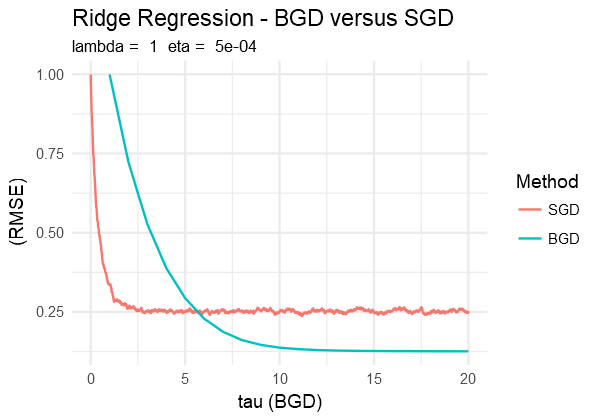

In [20]:
# Plot the errors on a shared frame
options(repr.plot.width=5, repr.plot.height=3.5)
ggplot(data=(results.combined), aes(x=(tau)/N, y=(RMSE), colour = type)) +
    geom_line() + xlab('tau (BGD)')+
    ggtitle('Ridge Regression - BGD versus SGD', subtitle=paste('lambda = ', lambda, " eta = ", eta)) +
    scale_color_discrete(guide = guide_legend(title = 'Method')) + theme_minimal()

__Q1-3D__. Explain your observation based on the errors plot you generated in Part C. Particularly, discuss the convergence speed and the fluctuations you see in the error trends.

For this discussion it seems more meaningful/intuitive to compare the models based on the BGD tau scale (1-20).

Hence each BGD tau incriment will be called a 'cycle'.

__ Observations__

The SGD model  converges to a minimum RMSE of approx 0.25 around $\tau \approx 3$ (ie 3 full cycles).

The BGD model converges to a minimum RMSE of approx 0.125 around $\tau \approx 12$ (ie 12 full cycles).

__ Convergence Speed__

Hence, for processing the same number of data points, the SGD appears to converge much faster in two senses. 

- Firstly SGD converges to the value of 0.25 about twice as quickly as BGD (approx 3 cycles for SGD vs approx 6 cycles for BGD). This value was the minimum RMSE for SGD
- Secondly SGD converges to its minimum RMSE (approx 0.25) much quicker (approx 4 times) than BGD converges to its minimum RMSE (approx 0.125)


__ Convergence Depth __

The minimum RMSE for BGD was approx half the minimum RMSE for SGD (approx 0.125 for BGD vs approx 0.25 for SGD). This suggests that there was some irretrievable useful information lost when computing the $\nabla E$ in SGD with a single data point at a time, as opposed to using all available data, where data fluctuations will combine and partially cancel out within the gradient summation. Perhaps this level of detail could be recovered by using a smaller learning rate $\eta$ for SGD, but then it would lose its advantage over BGD and may take longer overall.

__ Fluctuations__

It is visually quite clear that the BGD is very close to smooth, ie few if any fluctuations, whereas the SGD curve has a noticeable ammount of fluctuation once it has converged to the approximate local minimum. Given that the BGD curve verifies the actual minimum to be much lower, this suggests that the learning rate used in SGD was too high and so the algorithm got stuck when it was relatively close to the minimum (approx 0.25) ie each update to the weights changed their magnitude too much to properly converge any closer to the true value. 

__ Conclusion__

The long standing comparison between BGD and SGD was validated here, namely that SGD converges to a minimum quicker than BGD so is useful for a rough ('quick and dirty') first approximation, however there are more fluctuations in error, particularly once it has reached the minimum, whereas the gradient computed in BGD is able to mostly combine and remove the fluctuations and can converge to a lower minimum error for a higher step size.

## Part B. Bias-Variance Analysis
In this part, you conduct a bias-variance study on the Ridge regression that you have developed in Part A. This task assesses your analytical skills, and is based on Chapter 6 of Module 2. You basically recreate Figure 2.6.3 of Module 2 using your implementation of Ridge regression (with SGD) from Part A.

### Question 2 [Bias-Variance for Ridge Regression, 30 Marks]
__2A__. Load __Task2B_train.csv__ and __Task2B_test.csv__ sets,



In [21]:
set.seed(1234)

# Load training and test data
train <- scale(read.csv('../Task2B_train.csv'))
test <- scale(read.csv('../Task2B_test.csv'))

train.data <- subset(train, select = -c(y))
train.label <- train[, 'y', drop=FALSE]

test.data <- subset(test, select = -c(y))
test.label <- test[, 'y', drop=FALSE]

train.len <- nrow(train)
test.len <- nrow(test)

In [22]:
train.len
test.len

[1] 930

[1] 930

__2B__. Sample 50 sets from the provided training set, each of which having 100 randomly selected data points (with replacement).



In [23]:
L <- 50 # Number of sets
sample.size <- 100
samples <- t(replicate(L, sample(1:train.len, sample.size, replace=TRUE), simplify="matrix"))

In [24]:
samples[1:3,]

106,579,567,580,801,596,9,217,620,479,...,155,838,125,123,98,476,280,25,288,691
33,526,261,190,125,303,145,121,406,36,...,595,924,120,822,754,765,777,682,915,595
615,492,296,715,490,682,287,376,191,917,...,610,385,886,227,567,705,646,108,592,288


In [25]:
lambda.values <- seq(0, 5, by=0.2)
M <- length(lambda.values) # Number of models of complexity

__2C__. For each $\lambda$ in $\{0, 0.2, 0.4, 0.6, \ldots, 5\}$ do:

1. Build 50 regression models using the sampled sets

2. Based on the predictions of these models on the testset, calculate the (average) test error, variance, $(\text{bias})^2$, and  $\text{variance } +(\text{ bias})^2$.

Plot the (average) test error, variance, $(\text{bias})^2$, and $\text{variance } +(\text{ bias})^2$ versus $\log (\lambda)$.


In [26]:
# Build the models
y <- data.frame(matrix(0,nrow=L*M, ncol=test.len+2))
names(y) <- c('m', 'l',  paste('y',1:(test.len), sep=''))
y$m <- rep(lambda.values, 1, each = L)
y$l <- rep(1:L, M, each = 1)

In [27]:
tail(y,3)

,m,l,y1,y2,y3,y4,y5,y6,y7,y8,...,y921,y922,y923,y924,y925,y926,y927,y928,y929,y930
1298,5,48,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1299,5,49,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1300,5,50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Before we run it on the whole set of boostrap samples l = 1...50, try it on four to tweak the SGD parameters:

In [28]:
list.of.temp.plots <- list()
temp.plot.counter <-1

for (l in 1:4){ # for each dataset - we're testing it L times (i.e. 100 times)
    indx <- samples[l,]
    print(l)
    flush.console()
    for (m in lambda.values){ # for each degree of polynomial (model complexity)...
        #print(m)
        #print(train.data[indx,])
        
        results.sgd.boostrap <- SGD(train.data[indx,], train.label[indx], tau.max=5*length(indx), eta = 0.01, lambda = m)
        
        
        list.of.temp.plots[[temp.plot.counter]] <- ggplot(data=(results.sgd.boostrap$error), 
                                                          aes(x=(tau), y=(RMSE), colour = 'red')) +
            geom_line() +xlab('tau (SGD)') +
            ggtitle('Ridge Regression - BGD versus SGD') +
            scale_color_discrete(guide = guide_legend(title = 'Method')) + theme_minimal()
        
        temp.plot.counter <- temp.plot.counter+1
    }   
}

[1] 1
[1] 2
[1] 3
[1] 4


Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 1 rows containing missing values (geom_path)."Warning message:
"Removed 1 rows containing missing values (geom_path)."

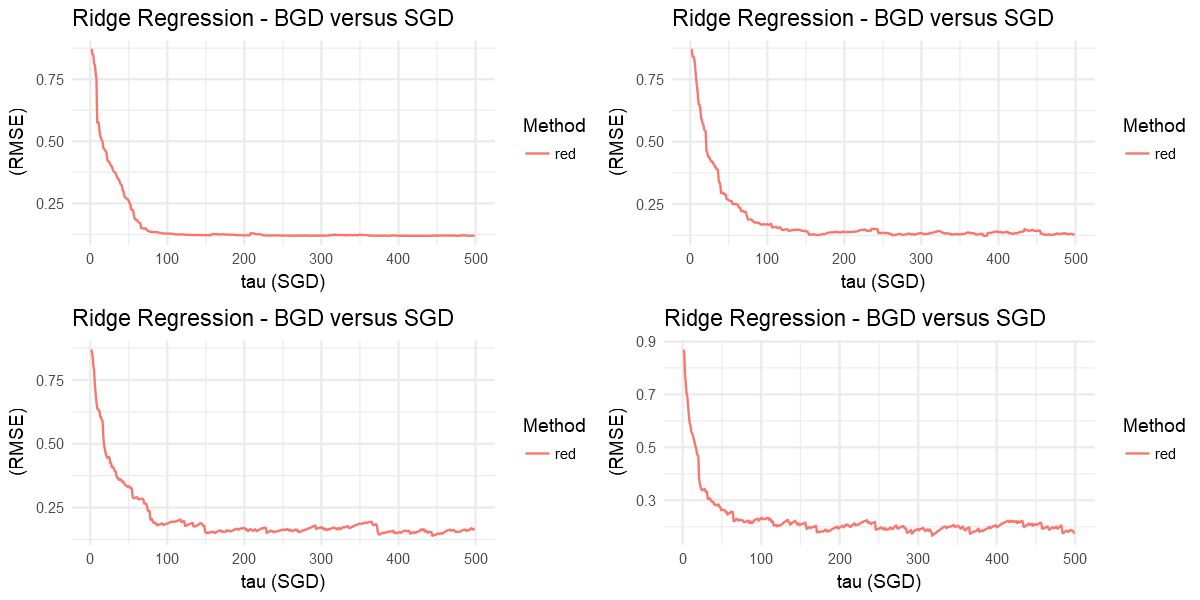

In [29]:
options(repr.plot.width=10, repr.plot.height=5)
grid.arrange(list.of.temp.plots[[1]],
             list.of.temp.plots[[2]],
             list.of.temp.plots[[3]],
             list.of.temp.plots[[4]],
             ncol=2
            )

The following graphs, with good convergent SGD curves, were obtained by experimenting with the learning rate $\eta$ and tau.max.

Initially tau.max was set very high, eg 10 x length(indx) or 20 x length(indx) where length(index) = 100 (size of boostrap sample)

Then eta = 0.01 was decided via experimentation. If eta = 0.1 the curve fluctuates too much and doesn' converge. For eta = 0.01, it converges very (too)  slowly.

Then it was observed that for eta = 0.1, the curves converged around tau = 500 , so we set tau.max=5*length(indx)

In [30]:
for (l in 1:L){ # for each dataset - we're testing it L times (i.e. 100 times)
    indx <- samples[l,]
    print(l)
    flush.console()
    for (m in lambda.values){ # for each degree of polynomial (model complexity)...
        #print(m)
        #print(train.data[indx,])
        
        results.sgd.boostrap <- SGD(train.data[indx,], train.label[indx], tau.max=5*length(indx), eta = 0.01, lambda = m)
        coeff <- results.sgd.boostrap$coeff
        
        y[y$m==m & y$l==l, -c(1,2)] <- predict_func(Phi=as.matrix(cbind('x0'=1, test.data)),w=coeff) 
        
        #print(round(coeff),2)
    }   
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50


In [31]:
head(y,3)

m,l,y1,y2,y3,y4,y5,y6,y7,y8,...,y921,y922,y923,y924,y925,y926,y927,y928,y929,y930
0,1,-1.197500,-1.209331,-1.210692,-1.183136,-1.179525,-1.177290,-1.178884,-1.175452,...,2.896165,2.805489,2.691999,2.704979,2.749512,2.663592,2.539442,2.494092,2.460900,2.509931
0,2,-1.174181,-1.184005,-1.185424,-1.160469,-1.156785,-1.154485,-1.155876,-1.152736,...,2.747148,2.663408,2.558251,2.571395,2.613229,2.536061,2.419694,2.377212,2.345228,2.390364
0,3,-1.200295,-1.212088,-1.213363,-1.185932,-1.182350,-1.180139,-1.181704,-1.178229,...,2.887626,2.797827,2.685448,2.698053,2.742033,2.656530,2.533872,2.489110,2.456466,2.505177


In [32]:
tail(y,3)

,m,l,y1,y2,y3,y4,y5,y6,y7,y8,...,y921,y922,y923,y924,y925,y926,y927,y928,y929,y930
1298,5,48,-0.5079134,-0.5149687,-0.5153706,-0.5014766,-0.5001355,-0.4992884,-0.5000824,-0.4983678,...,1.320465,1.276968,1.222983,1.227957,1.248600,1.204760,1.147279,1.126268,1.1120444,1.135761
1299,5,49,-0.4948979,-0.5014865,-0.5019300,-0.4886200,-0.4872686,-0.4864313,-0.4872151,-0.4855745,...,1.286151,1.244080,1.191781,1.196740,1.216776,1.174779,1.118858,1.098416,1.0843644,1.107271
1300,5,50,-0.5253634,-0.5313409,-0.5317142,-0.5193687,-0.5180422,-0.5171991,-0.5178691,-0.5163028,...,1.180091,1.141161,1.092729,1.097463,1.116133,1.077433,1.025543,1.006607,0.9935412,1.014801


In [33]:
# calculate the model  average across all boostrap samples (for each complexity m)
y.bar <- aggregate(y, list(y$m),mean)
y.bar <- as.matrix(y.bar[,-c(1:3)])

In [34]:
head(y.bar,3)

y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y921,y922,y923,y924,y925,y926,y927,y928,y929,y930
-1.195078,-1.206845,-1.208174,-1.180777,-1.177135,-1.174799,-1.176274,-1.172881,-1.169082,-1.175658,...,2.904588,2.814428,2.701629,2.715062,2.759718,2.674739,2.550989,2.505771,2.472692,2.521325
-1.115234,-1.127716,-1.128864,-1.101551,-1.098278,-1.096200,-1.097721,-1.094346,-1.090353,-1.097067,...,2.792221,2.703833,2.593543,2.605611,2.648718,2.563411,2.443651,2.399883,2.368646,2.416502
-1.046661,-1.059079,-1.060114,-1.033665,-1.030653,-1.028752,-1.030249,-1.026984,-1.023027,-1.029598,...,2.657745,2.572812,2.466964,2.478060,2.519178,2.436305,2.321928,2.280124,2.250642,2.296708


In [35]:
# Calculate the bias^2, variance, and test error

In [36]:
error <- matrix(0,nrow=M)
bias2 <- matrix(0,nrow=M)
variance <- matrix(0,nrow=M)

In [37]:
for (m in c(1:M)){
    bias2[m] <- mean((y.bar[m,] - test.label)^2)
    variance[m] <- mean((y[y$m==lambda.values[m],-c(1,2)]-y.bar[m,])^2)
    error[m] <- mean((y[y$m==lambda.values[m],-c(1,2)]-test.label)^2)
} 

In [38]:
# Reshape the results if needed
Q2.results <- as.data.frame(cbind(lambda.values, bias2, variance, error, bias2+variance))
names(Q2.results) <- c('lambda', 'bias2', 'variance', 'error', 'bias2variance')

In [39]:
head(Q2.results,3)

lambda,bias2,variance,error,bias2variance
0.0,0.01665446,1.941338,1.953830,1.957992
0.2,0.01989565,1.747388,1.856681,1.767284
0.4,0.02796267,1.563869,1.765050,1.591832


In [40]:
Q2.results.m <- melt(Q2.results, id='lambda')
names(Q2.results.m) <- c('lambda', 'variable','value')

In [41]:
head(Q2.results.m,3)

lambda,variable,value
0.0,bias2,0.01665446
0.2,bias2,0.01989565
0.4,bias2,0.02796267


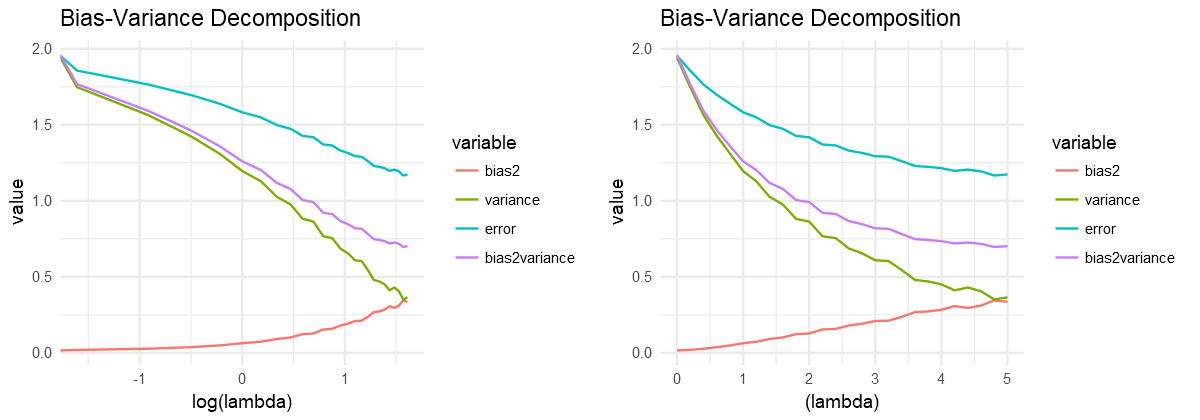

In [42]:
Q2.plot.log.lambda <- ggplot(data=Q2.results.m, aes(x=log(lambda), y=value, color=variable)) + geom_line() + 
        labs(title='Bias-Variance Decomposition') +  theme_minimal()

Q2.plot.normal.lambda <- ggplot(data=Q2.results.m, aes(x=(lambda), y=value, color=variable)) + geom_line() + 
        labs(title='Bias-Variance Decomposition') +  theme_minimal()

options(repr.plot.width=10, repr.plot.height=3.5)
grid.arrange(Q2.plot.log.lambda,
             Q2.plot.normal.lambda,
             ncol = 2
            )

__2D__. Based on your plot in the previous step (C), what’s the best value for $\lambda$? Explain your answer in terms of the bias, variance, and test error.

 As the plot shows, the best value for $\lambda$ was our upper bound, namely $\lambda$ = 5 ie log($\lambda$) $\approx$ 1.6
 
 Reasoning...
 
 We are trying to minimise the error (ie test error) which has the same general curve as bias2+variance but is larger. Clearly as $\lambda$ (or log($\lambda$)) increases, both the blue (test) error curve and the purple bias2variance curve decrease. Therefore our upper bound of $\lambda$ = 5 is the best value for $\lambda$.
 
 The bias2 and variance curves give a good explanation though for why lambda = 5 is the best choice. 
 
Initially, for $\lambda$ $\approx$ 0 on the LHS of the curve, variance is very high, indicating overfitting. Recall that $\lambda$ is the coefficient for the regularisation function which penalises/minimises complexity, so a higher value of $\lambda$ (RHS of graph) reduces model complexity while a low value of $\lambda$ (LHS of graph) has higher model complexity. If the model is too complex for the given data, it will tend to model noise and overfit the training set, so will not generalise well to the test set, hence the variance, bias2variance and error curves are all very high on the LHS of the graph. The bias is low however because even with overfitting the average model tends to approximate the correct answer.

As $\lambda$ increases from left to right, the model complexity decreases and hence so does the potential for overfitting, so the variance decreases. Correspondingly, the bias does slowly increase, but much not as much as the variance decreases, so that their combined curve bias2variance and corresponding error curve continue to decrease as $\lambda$ increases from 0 to 5.

However when $\lambda$ = 5, the bias and variance curves have approximately the same value, but the gradient clearly shows that if $\lambda$ increases much past 5, the bias will continue to increase while the variance decreases towards 0. Hence we suspect for some value close to but larger than 5, the (test) error will start increasing again as the model will start underfitting ie the average model will not be able to always make the right predictions. 

Hence not only is $\lambda \approx 5$ the best value of $\lambda$ tested so far, but we predict that if $\lambda$ is increased much beyond 5, the error will increase anyway.

## Part C. Logistic Regression vs. Bayesian Classifier
This task assesses your analytical skills. You need to study the performance of two well-known generative and discriminative models, i.e. Bayesian classifier and logistic regression, as the size of the training set increases. Then, you show your understanding of the behaviour of learning curves of typical generative and discriminative models.

### Question 3 [Discriminative vs Generative Models, 35 Marks]


__3A__. Load __Task2C_train.csv__ and __Task2C_test.csv__ as well as the Bayesian classifier (BC) and logistic regression (LR) codes from Activities 2 and 3 in Module 3.


In [43]:
set.seed(1234)

# Load training and test data
train <- read.csv('../Task2C_train.csv')
test <- read.csv('../Task2C_test.csv')

train.len <- nrow(train)
test.len <- nrow(test)

train.data <- subset(train, select = -c(y))
train.label <- train[, 'y', drop=FALSE]

test.data <- subset(test, select = -c(y))
test.label <- test[, 'y', drop=FALSE]


In [44]:
#' Trains a Bayesian Classifier model for labels with two classes
#'
#' @param train.data the predictors for the training set
#' @param train.label the labels for the training set
#' @param c0 first class label
#' @param c1 second class label
#' @return a function to be used for making predictions with the trained model
bayesian_classifier <- function(train.data, train.label, c0 = 1, c1 = -1) {
    # Class probabilities:
    p0.hat <- sum(train.label==c0)/nrow(train.data) # total number of samples in class 0 divided by the total number of training data
    p1.hat <- sum(train.label==c1)/nrow(train.data) # or simply 1 - p1.hat
    
    mu0.hat <- colMeans(train.data[train.label==c0,])
    mu1.hat <- colMeans(train.data[train.label==c1,])
    
    sigma0.hat <- var(train.data[train.label==c0,])
    sigma1.hat <- var(train.data[train.label==c1,])

    # shared covariance matrix:
    sigma.hat <- p0.hat * sigma0.hat + p1.hat * sigma1.hat 

    # calculate posteriors:
    posterior0 <- p0.hat*dmvnorm(x=train.data, mean=mu0.hat, sigma=sigma.hat)
    posterior1 <- p1.hat*dmvnorm(x=train.data, mean=mu1.hat, sigma=sigma.hat)
    
    # calculate predictions:
    
    predict <- function(T) {
        return (ifelse(p0.hat*dmvnorm(x=T, mean=mu0.hat, sigma=sigma.hat) > p1.hat*dmvnorm(x=T, mean=mu1.hat, sigma=sigma.hat),
                           c0, c1))    
    }
    
    return (list("predict"=predict))
}    

In [45]:
#' Trains a Logistic Regression classifier model for labels with two classes
#'
#' @param train.data the predictors for the training set
#' @param train.label the labels for the training set
#' @param c0 first class label
#' @param c1 second class label
#' @return a function to be used for making predictions with the trained model
logistic_reg <- function(train.data, train.label, c0 = 1, c1 = -1) {
    train.len <- nrow(train.data)
    
    # Sigmoid function (=p(C1|X))
    sigmoid <- function(w, x){
        return(1.0/(1.0+exp(-w%*%t(cbind(1,x)))))    
    }
    
    # auxiliary function that predicts class labels
    predict <- function(w, X) {
        sig <- sigmoid(w, X)
        return(ifelse(sig>0.5, c1,c0))
    }

    # auxiliary function that calculate a cost function
    cost <- function (w, X, T, c0){
        sig <- sigmoid(w, X)
        return(sum(ifelse(T==c0, 1-sig, sig)))
    }    
    
    # Step 1 - Initialise
    tau.max <- 1000 # maximum number of iterations
    eta <- 0.01 # learning rate
    epsilon <- 0.01 # a threshold on the cost (to terminate the process)
    tau <- 1 # iteration counter
    terminate <- FALSE

    ## Just a few name/type conversion to make the rest of the code easy to follow
    X <- as.matrix(train.data) # rename just for conviniance
    T <- ifelse(train.label==c0,0,1) # rename just for conviniance

    W <- matrix(,nrow=tau.max, ncol=(ncol(X)+1)) # to be used to store the estimated coefficients
    W[1,] <- runif(ncol(W)) # initial weight (any better idea?)

    # project data using the sigmoid function (just for convenient)
    Y <- sigmoid(W[1,],X)

    costs <- data.frame('tau'=1:tau.max)  # to be used to trace the cost in each iteration
    costs[1, 'cost'] <- cost(W[1,],X,T, c0)
    
    while(!terminate){
        # check termination criteria:
        terminate <- tau >= tau.max | cost(W[tau,],X,T, c0)<=epsilon

        # shuffle data:
        train.index <- sample(1:train.len, train.len, replace = FALSE)
        X <- X[train.index,]
        T <- T[train.index]

        # for each datapoint:
        for (i in 1:train.len){
            # check termination criteria:
            if (tau >= tau.max | cost(W[tau,],X,T, c0) <=epsilon) {terminate<-TRUE;break}

            Y <- sigmoid(W[tau,],X)

            # Update the weights
            W[(tau+1),] <- W[tau,] - eta * (Y[i]-T[i]) * cbind(1, t(X[i,]))

            # record the cost:
            costs[(tau+1), 'cost'] <- cost(W[tau,],X,T, c0)

            # update the counter:
            tau <- tau + 1

            # decrease learning rate:
            eta = eta * 0.999
        }
    }
    # Done!
    costs <- costs[1:tau, ] # remove the NaN tail of the vector (in case of early stopping)

    # the  final result is:
    w <- W[tau,] 
    
    return (list("w"=w, "predict"=function(T) predict(w, T)))
}

__3B__. Using the first 5 data points from the training set, train a BC and a LR model, and compute their test errors. In a “for loop”, increase the size of training set (5 data points at a time), retrain the models and calculate their test errors until all training data points are used. In one figure, plot the test errors for each model (with different colors) versus the size of the training set; name the plot “Learning Curve” and add it to your report.



In [46]:
classification_error_func <- function(T_hat, T) {
    return (sum(T_hat!=T)/nrow(T_hat) * 100)
}

In [47]:
train.len

[1] 500

In [48]:
models <- seq(5, train.len, by=5)

In [49]:
models[1:10]

[1]  5 10 15 20 25 30 35 40 45 50

In [50]:
model.errors <- as.data.frame(x = models)
model.errors$bayes <- 0
model.errors$logistic <- 0

In [51]:
head(model.errors,3)

models,bayes,logistic
5,0,0
10,0,0
15,0,0


In [52]:
# create models for different sizes of training data
for(model.size in models){
    
    # bayes classifier
    bayes.predictor <- bayesian_classifier(train.data[1:model.size,], train.label[1:model.size,], c0 = 1, c1 = -1)$predict
    bayes.predictions <- as.matrix(bayes.predictor(test.data))
    model.errors[model.errors$model==model.size,'bayes'] <- classification_error_func(bayes.predictions, test.label)
    
    #logistic_reg
    
    logistic.predictor <- logistic_reg(train.data[1:model.size,], train.label[1:model.size,], c0 = 1, c1 = -1)$predict
    logistic.predictions <- t(logistic.predictor(test.data))
    model.errors[model.errors$model==model.size,'logistic'] <- classification_error_func(logistic.predictions, test.label)
    
}#end for

In [53]:
head(model.errors,3)

models,bayes,logistic
5,68.4,10.6
10,1.4,2.0
15,1.8,1.4


In [54]:
tail(model.errors,3)

,models,bayes,logistic
98,490,2,1.4
99,495,2,1.4
100,500,2,1.4


In [55]:
# Reshape the results if needed
model.errors.m <- melt(model.errors, id='models')
names(model.errors.m) <- c('models', 'variable','error')

In [56]:
head(model.errors.m,3)

models,variable,error
5,bayes,68.4
10,bayes,1.4
15,bayes,1.8


__Plot Learning Curve (Bayes vs Logistic)__

We plot three graphs:

The first two both have the y axis (misclassify %) log-scaled because there is a drastic jump from approx 100 to approx 0 as size increases. The first has the x axis (training set size) normal, the second has it log scaled.

The third graph has no log scaling on any axes.

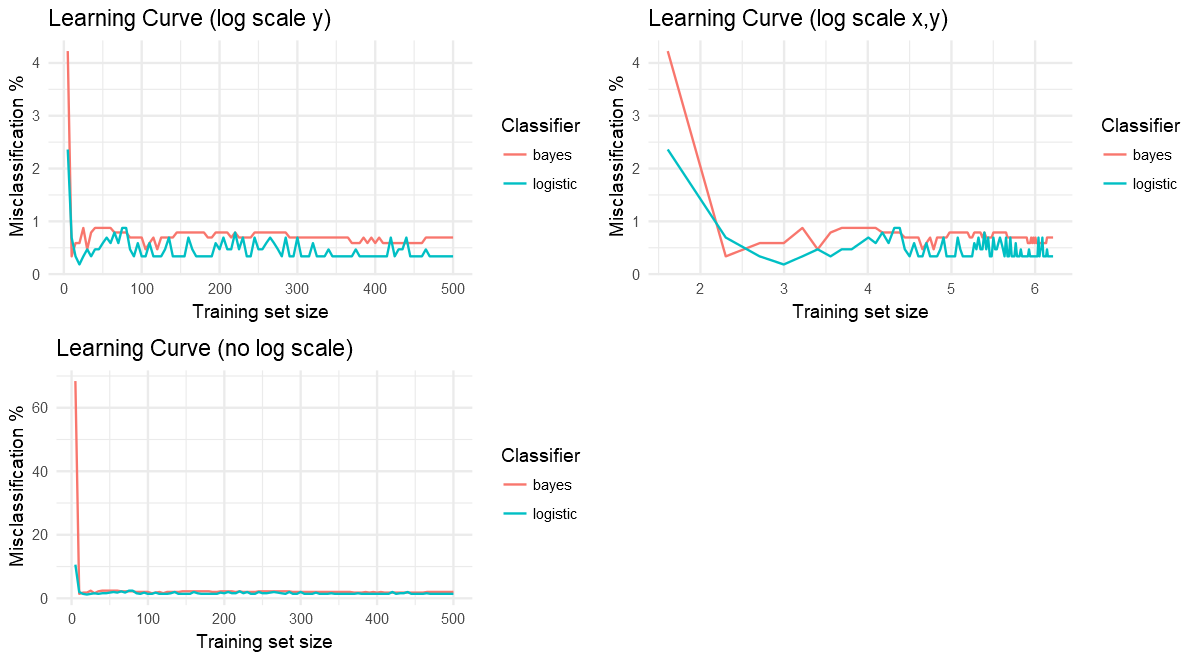

In [57]:
Q3.plot.log.y <- ggplot(data=(model.errors.m), aes(x=(models), y=log(error), colour = variable)) +
    geom_line() +#xlab('tau (SGD)') +
    ggtitle('Bayes vs Logistic') +
    labs(title='Learning Curve (log scale y)', x='Training set size', y='Misclassification %', color="Classifier") + theme_minimal()

Q3.plot.log.x.log.y <- ggplot(data=(model.errors.m), aes(x=log(models), y=log(error), colour = variable)) +
    geom_line() +#xlab('tau (SGD)') +
    ggtitle('Bayes vs Logistic') +
    labs(title='Learning Curve (log scale x,y)', x='Training set size', y='Misclassification %', color="Classifier") + theme_minimal()

Q3.plot.no.log <- ggplot(data=(model.errors.m), aes(x=(models), y=(error), colour = variable)) +
    geom_line() +#xlab('tau (SGD)') +
    ggtitle('Bayes vs Logistic') +
    labs(title='Learning Curve (no log scale)', x='Training set size', y='Misclassification %', color="Classifier") + theme_minimal()

options(repr.plot.width=10, repr.plot.height=5.5)
grid.arrange(Q3.plot.log.y,
             Q3.plot.log.x.log.y,
             Q3.plot.no.log,
             ncol = 2
            )

__3C__. Explain your observations in your report:
1. What does happen for each classifier when the number of training datapoints is increased?

    >__Bayesian Classifier__      
    > Initially, when training datapoints are very low (close to 5) the misclassification error is very high (68.4%)
    > This quickly drops to approx 2% for training set size $\geq 10$
    > Even with some fluctuations, the misclassification error stays around 2% for most of the remaining training set sizes
    > This suggests that a Bayesian classifier is terrible for a very small dataset but is relatively good and stable once 
    > it has enough data points.
    >
    >__Logistic Regression__  
    > Initially, when training datapoints are very low (close to 5) the misclassification error is around 10% (9.6%) 
    > This quickly drops to approx 2% for training set size $\geq 10$
    > Even with some fluctuations, the misclassification error stays around 2% for most of the remaining training set sizes
    > This suggests that a Logistic Regression classifier is okay for a very small dataset and also relatively good once it has 
    > more data points, though more prone to fluctuations than the Bayes classifier.
    >
    >
    
2. Which classifier is best suited when the training set is small, and which is best suited when the training set is big?
    > The logistic regression classifier is best suited when the training set is small (approx 5) because its error
    > was about 5 times smaller (9.6% vs 68.4%).
    > 
    > For almost all training set sizes, included when the training set is big, logistic regression performed slightly better
    > than the bayes classifer, though they both had errors approx 2% which is very impressive.
    >
    > Hence for both small and large datasets, the discriminative logistic regression classifier was better than the generative bayesian classifier.
    
3. Justify your observations in  C.1 and C.2 by providing some speculations and possible reasons.

    - Hint: Think about model complexity and the fundamental concepts of machine learning covered in Module 1.

   > __Why is Logistic Regression better than Bayes Classifiers on small & large datasets?__
   >
   > It is a widely held belief in statistics that discriminative classifiers (eg logistic regression) outperform their 
   > generative counterparts (like bayesian classifiers). This is easy to see when the dataset is too small, eg only 5 datapoints, because the generative (bayesian) classifiers have more parameters that need to be fitted because they are not
   > just determining the posterior but the prior and likelihood as well. Indeed, from Module 3 Part 6 we read that for 
   > input variables $x$ with dimension $D$, the generative model (bayesian classifier) needed to fit $\frac{D(D+5)}{2}+1$ 
   > parameters which is quadratic in $D$ whereas the discriminative classifier (logistic regression) only needed to fit 
   > $D+1$ which is linear in $D$. A model with more parameters needs more data to properly fit, and is more prone to 
   > overfitting on a small ammount of data.
   >
   > It is slightly harder to exlain why the discriminative classifier also outperformed the generative classifier when the 
   > dataset was larger. One reason is that generative models make more assumptions about the distributions of the data, 
   > and so is more prone to errors if these assumptions are not valid. In particular, the bayesian classifier assumes the 
   > prior for each class is given by the fraction of that class and also assumes that the likelihood of the input data in each 
   > class follows a certain multivariate normal distribution. That's a big assumption which often isn't completely met, due to 
   > skewness etc. In contrast, the discriminative classifier (logistic regression) doesn't assume the distribution of the data
   > but just tries to find the optimal linear decision boundary if the data is linearly separable. 
   > 
   > From the curves it appears that the Bayesian classifer is more smooth while the Logistic regression has more
   > fluctuations. This is probably because the estimates for the likelihood and priors used in Bayesian classifiers are relatively robust to outliers or points near the 'decision boundary' because we are primarily generating the distribution for 
   > each class and then comparing them rather than focusing on the decision boundary directly. Thus we expect little change
   > as our sample size increases once each sample is representative of the whole, which gets more and more likely with more 
   > data. To some extent, the opposite is true for 
   > logistic regression, where new points close to the decision boundary can easily alter it and/or be misclassified.
   > For a relatively linearly separable dataset, the effect is not too great, so that the logistic regression still has a lower
   > error than the bayesian classifier, but this explains why bayesian classifiers are more smooth/stable while logistic regression has more fluctuations.